In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#loading dataset
data=pd.read_csv("netflix_titles.csv")
data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Data cleaning

In [5]:
# updating the datatype of date_added column to datetime
data["date_added"] = pd.to_datetime(data["date_added"], errors='coerce')

In [6]:
# adding new column , month and year
data["month"]=data["date_added"].dt.month
data["year"]=data["date_added"].dt.year
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11.0,2019.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7.0,2019.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11.0,2019.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1.0,2020.0
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,3.0,2019.0


In [7]:
# renaming the column listed_in in to Genre
# then only showing the first Genre in Genre column
data=data.rename(columns={"listed_in":"Genre"})
data['Genre'] = data['Genre'].str.split(',').str[0]
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo...",9.0,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,9.0,2021.0


In [8]:
# handling the missing values
data.fillna({"director":"Missing",
             "cast":"Missing",
             "country":"Unavailable",
             "date_added": "Unavailable",
             "rating": "Unavailable",
             "duration": "Unavailable",
             "month": "Unavailable",
             "year": "Unavailable"},inplace=True)
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
Genre           0
description     0
month           0
year            0
dtype: int64

# visualization

### How many Movies and TV Shows are in the dataset

In [9]:
value_counts = data["type"].value_counts()
percentage_counts = ((value_counts / len(data["type"])) * 100).round(2)
result = pd.DataFrame({'Count': value_counts, 'Percentage': percentage_counts})
result

,Count,Percentage
type,,
Movie,6131,69.62
TV Show,2676,30.38


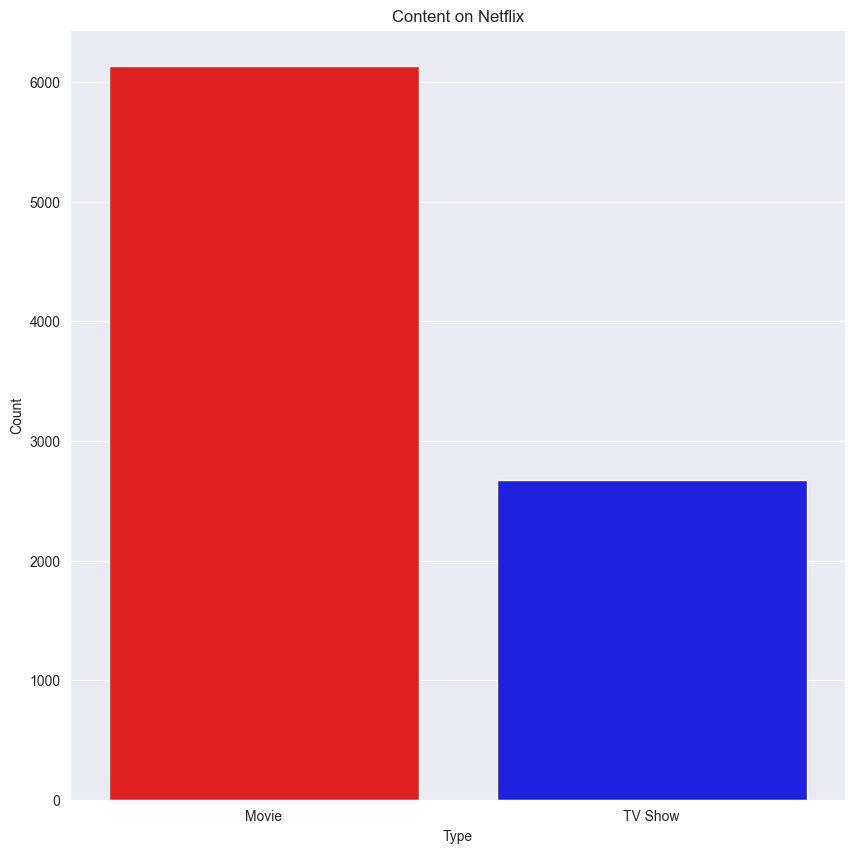

In [10]:
plt.figure(figsize =(10,10))
sns.set_style("darkgrid")
sns.countplot(x="type", data=data, hue="type", palette=["red", "blue"], legend=False)
plt.title("Content on Netflix")
plt.ylabel("Count")
plt.xlabel("Type")
plt.show()

* from this we can see 69.62 % of contents are Movies and 30.38% are TV shows

### Count of Shows in every year


In [11]:
count_in_year = data["year"].value_counts()
count_in_year

year
2019.0         1999
2020.0         1878
2018.0         1625
2021.0         1498
2017.0         1164
2016.0          418
Unavailable      98
2015.0           73
2014.0           23
2011.0           13
2013.0           10
2012.0            3
2009.0            2
2008.0            2
2010.0            1
Name: count, dtype: int64

* from this we can see the highest number of TV Shows and Movies are premiered

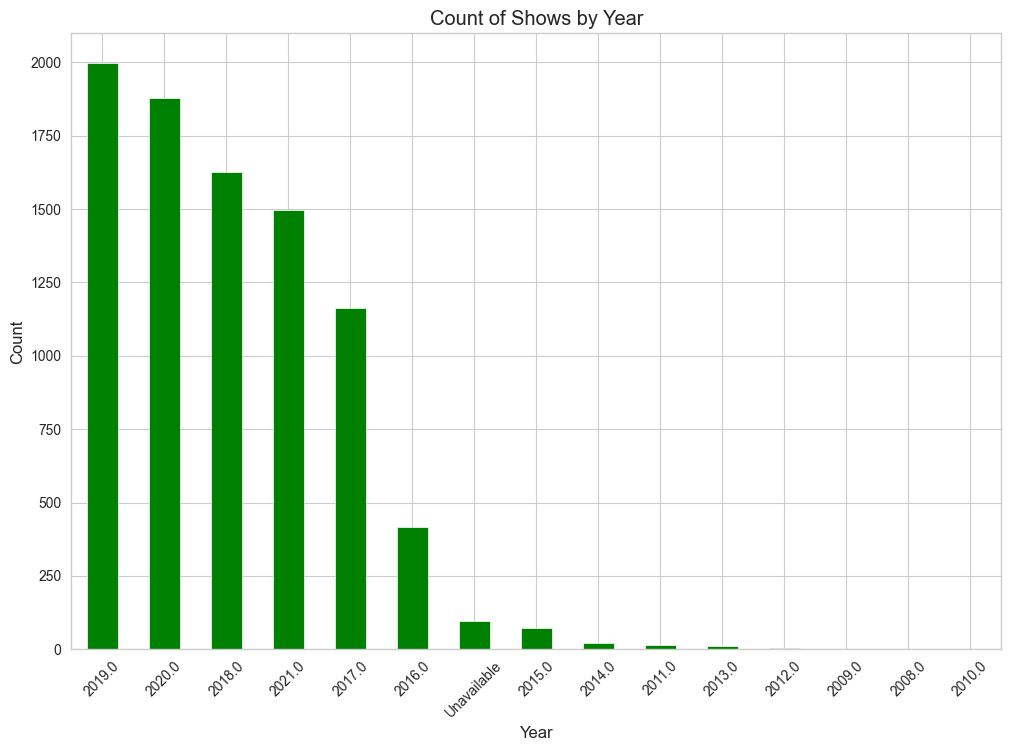

In [58]:
# Plotting the bar chart
plt.figure(figsize=(12, 8))
count_in_year.plot(kind='bar',color='green')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Shows by Year')
plt.xticks(rotation=45) 
plt.show()

In [13]:
data.groupby("year")["type"].value_counts()


year         type   
2008.0       TV Show       1
             Movie         1
2009.0       Movie         2
2010.0       Movie         1
2011.0       Movie        13
2012.0       Movie         3
2013.0       Movie         6
             TV Show       4
2014.0       Movie        19
             TV Show       4
2015.0       Movie        56
             TV Show      17
2016.0       Movie       253
             TV Show     165
2017.0       Movie       839
             TV Show     325
2018.0       Movie      1237
             TV Show     388
2019.0       Movie      1424
             TV Show     575
2020.0       Movie      1284
             TV Show     594
2021.0       Movie       993
             TV Show     505
Unavailable  TV Show      98
Name: count, dtype: int64

### Count of each type of shows in each year

In [14]:
grouped_data = data.groupby(["year", "type"]).size().reset_index(name='count')
#grouped_data
type_per_year= grouped_data.pivot(index='year', columns='type', values='count').reset_index()
type_per_year.columns.name = None 
type_per_year = type_per_year.fillna(0)
type_per_year

,year,Movie,TV Show
0,2008.0,1.0,1.0
1,2009.0,2.0,0.0
2,2010.0,1.0,0.0
3,2011.0,13.0,0.0
4,2012.0,3.0,0.0
5,2013.0,6.0,4.0
6,2014.0,19.0,4.0
7,2015.0,56.0,17.0
8,2016.0,253.0,165.0
9,2017.0,839.0,325.0


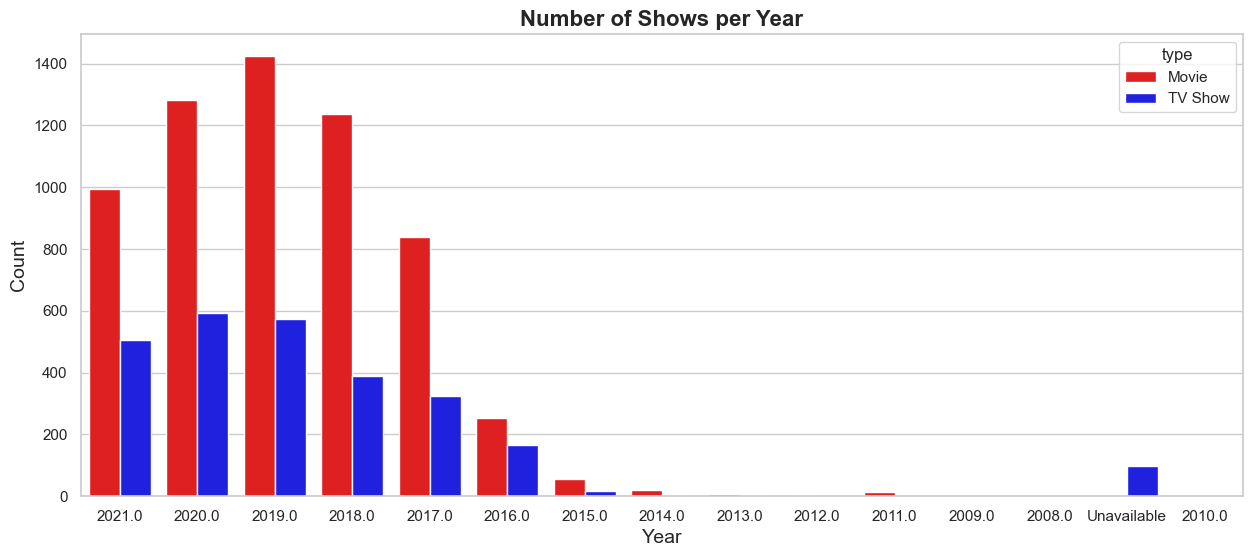

In [59]:
plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")
sns.countplot(x="year", hue="type", palette=["red", "blue"], data=data, order=data["year"].unique())
plt.title("Number of Shows per Year", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

* from this we can see that highest number of Movie premiered in 2019(1424) and TV Shows in 2020 (594)

### count of shows in each month

In [16]:
data["month"] = data["month"].replace({1 : "Jan",2 : "Feb",3 : "March",4:"April",5 :"May",6 :"June",7 : "July",
                        8 : "Aug",9:"Sept", 10 : "Oct",11 : "Nov",12 : "Dec"})

In [17]:
count_in_month = data["month"].value_counts()
count_in_month

month
July           819
Dec            797
Sept           765
April          759
Oct            755
Aug            749
March          734
Jan            727
June           724
Nov            697
May            626
Feb            557
Unavailable     98
Name: count, dtype: int64

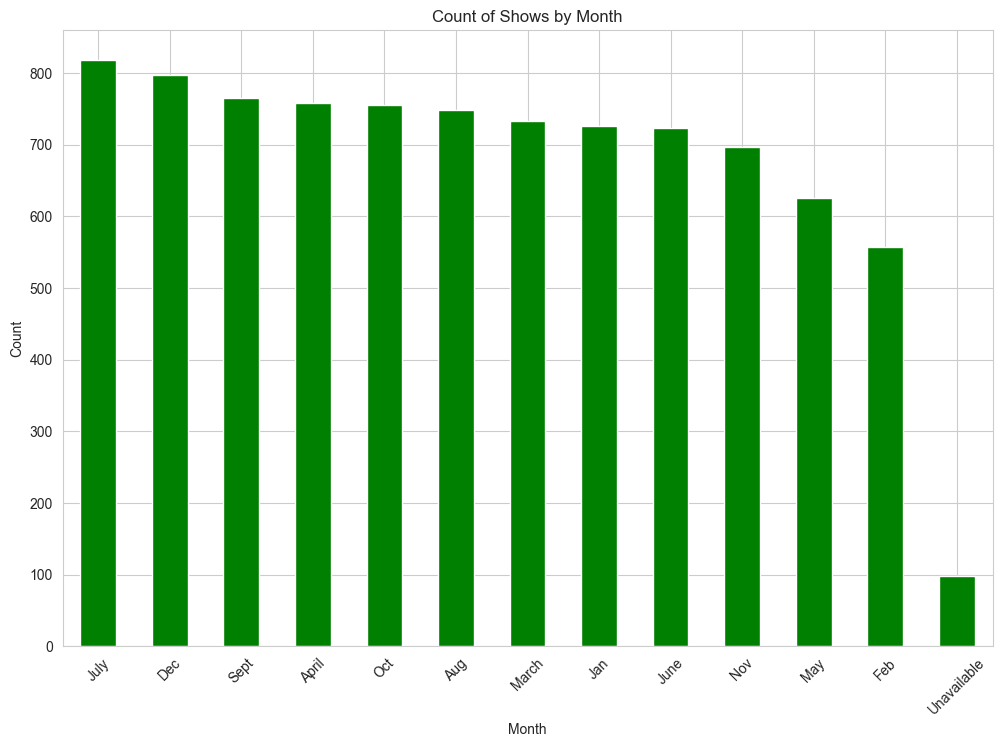

In [18]:
plt.figure(figsize=(12, 8))
count_in_month.plot(kind='bar',color='green')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Shows by Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

### Types of shows in wrt month 

In [19]:
grouped_data_month = data.groupby(["month", "type"]).size().reset_index(name='count')
type_per_month= grouped_data_month.pivot(index='month', columns='type', values='count').reset_index()
type_per_month.columns.name = None 
type_per_month = type_per_month.fillna(0)
type_per_month

,month,Movie,TV Show
0,April,550.0,209.0
1,Aug,519.0,230.0
2,Dec,547.0,250.0
3,Feb,382.0,175.0
4,Jan,546.0,181.0
5,July,565.0,254.0
6,June,492.0,232.0
7,March,529.0,205.0
8,May,439.0,187.0
9,Nov,498.0,199.0


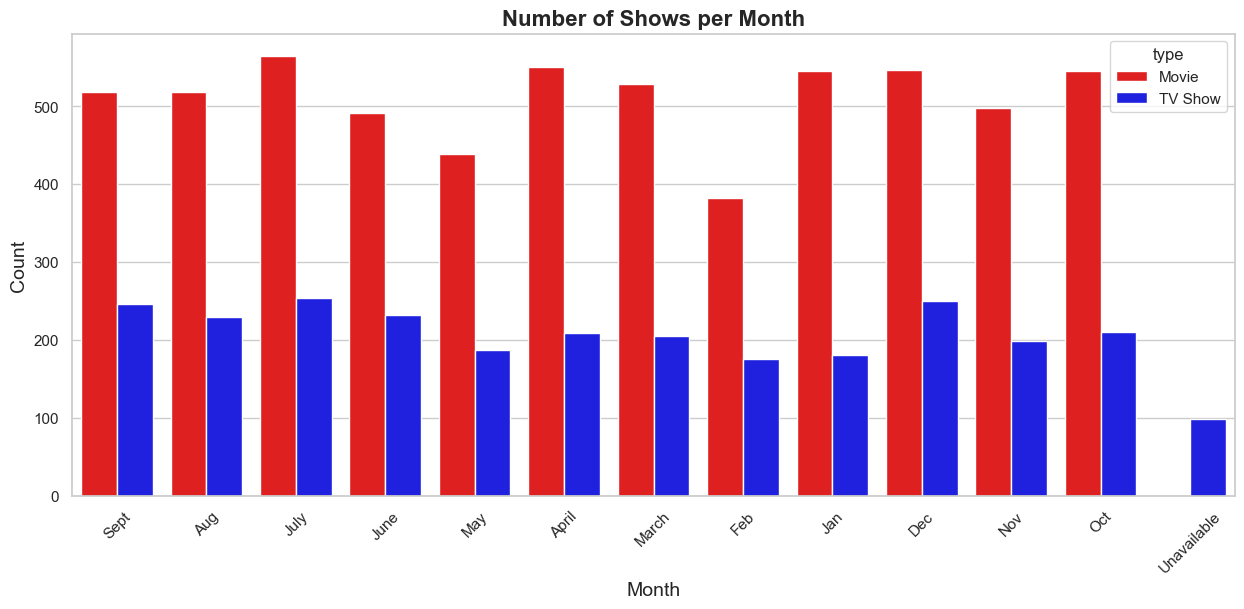

In [60]:
plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")
sns.countplot(x="month", order=data["month"].unique(), hue="type", palette=["red", "blue"], data=data)
plt.title("Number of Shows per Month", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()


* from this we can see that, highest number of Movies premiered in Month July(565)and TV Shows also In Month July(254)

### Top 10 countries content on Netflix

In [21]:
data["country"].value_counts().head(10)

country
United States     2818
India              972
Unavailable        831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

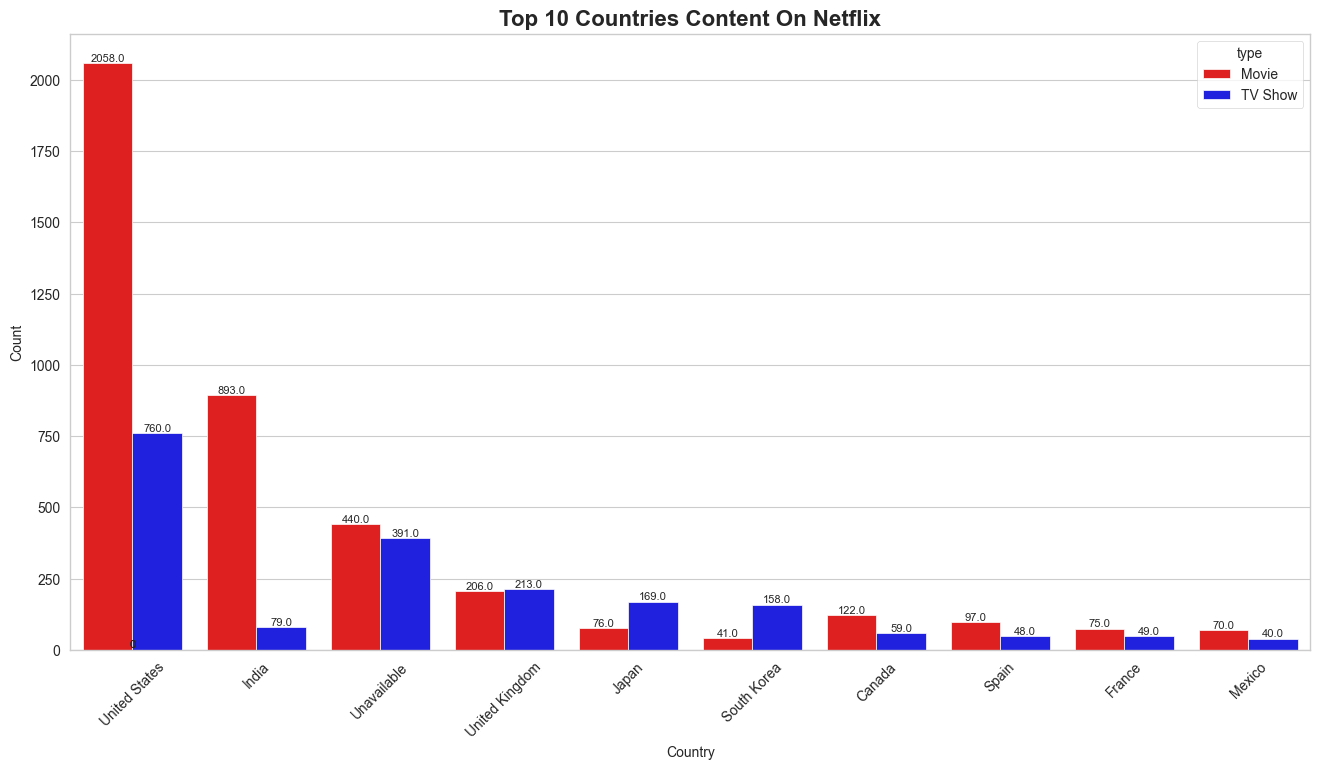

In [57]:
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
ax = sns.countplot(x="country", order=data["country"].value_counts().index[0:10], hue="type",palette=["red", "blue"], data=data)
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{}'.format(height), 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=8) 
plt.title("Top 10 Countries Content On Netflix", fontsize=16, fontweight='bold')
plt.xlabel("Country", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(rotation=45)
plt.show()

* from this we can understand that , highest number of shows are from USA

### Which are the top 10 ratings given to the show?

In [23]:
data["rating"].value_counts().head(10)

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution Of Rating')

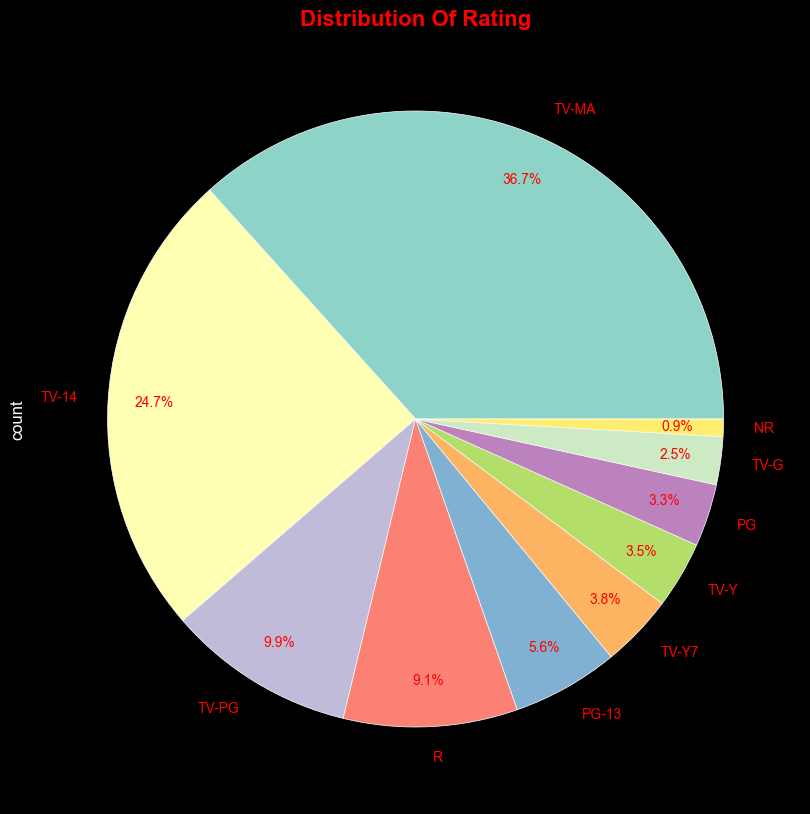

In [38]:
plt.style.use('dark_background')
plt.figure(figsize = (14,10))
data["rating"].value_counts()[:10].plot(kind="pie", autopct="%1.1f%%", pctdistance=0.85, textprops={'color':"red"})
plt.title("Distribution Of Rating", color='red', fontsize=16, fontweight='bold')

* from this we can understand that most rated rating is TV-MA

### highest premired genre on Netflix

In [25]:
genre_count=data["Genre"].value_counts()
genre_count

Genre
Dramas                          1600
Comedies                        1210
Action & Adventure               859
Documentaries                    829
International TV Shows           774
Children & Family Movies         605
Crime TV Shows                   399
Kids' TV                         388
Stand-Up Comedy                  334
Horror Movies                    275
British TV Shows                 253
Docuseries                       221
Anime Series                     176
International Movies             128
TV Comedies                      120
Reality TV                       120
Classic Movies                    80
TV Dramas                         67
Thrillers                         65
Movies                            57
TV Action & Adventure             40
Stand-Up Comedy & Talk Shows      34
Romantic TV Shows                 32
Classic & Cult TV                 22
Anime Features                    21
Independent Movies                20
Music & Musicals                

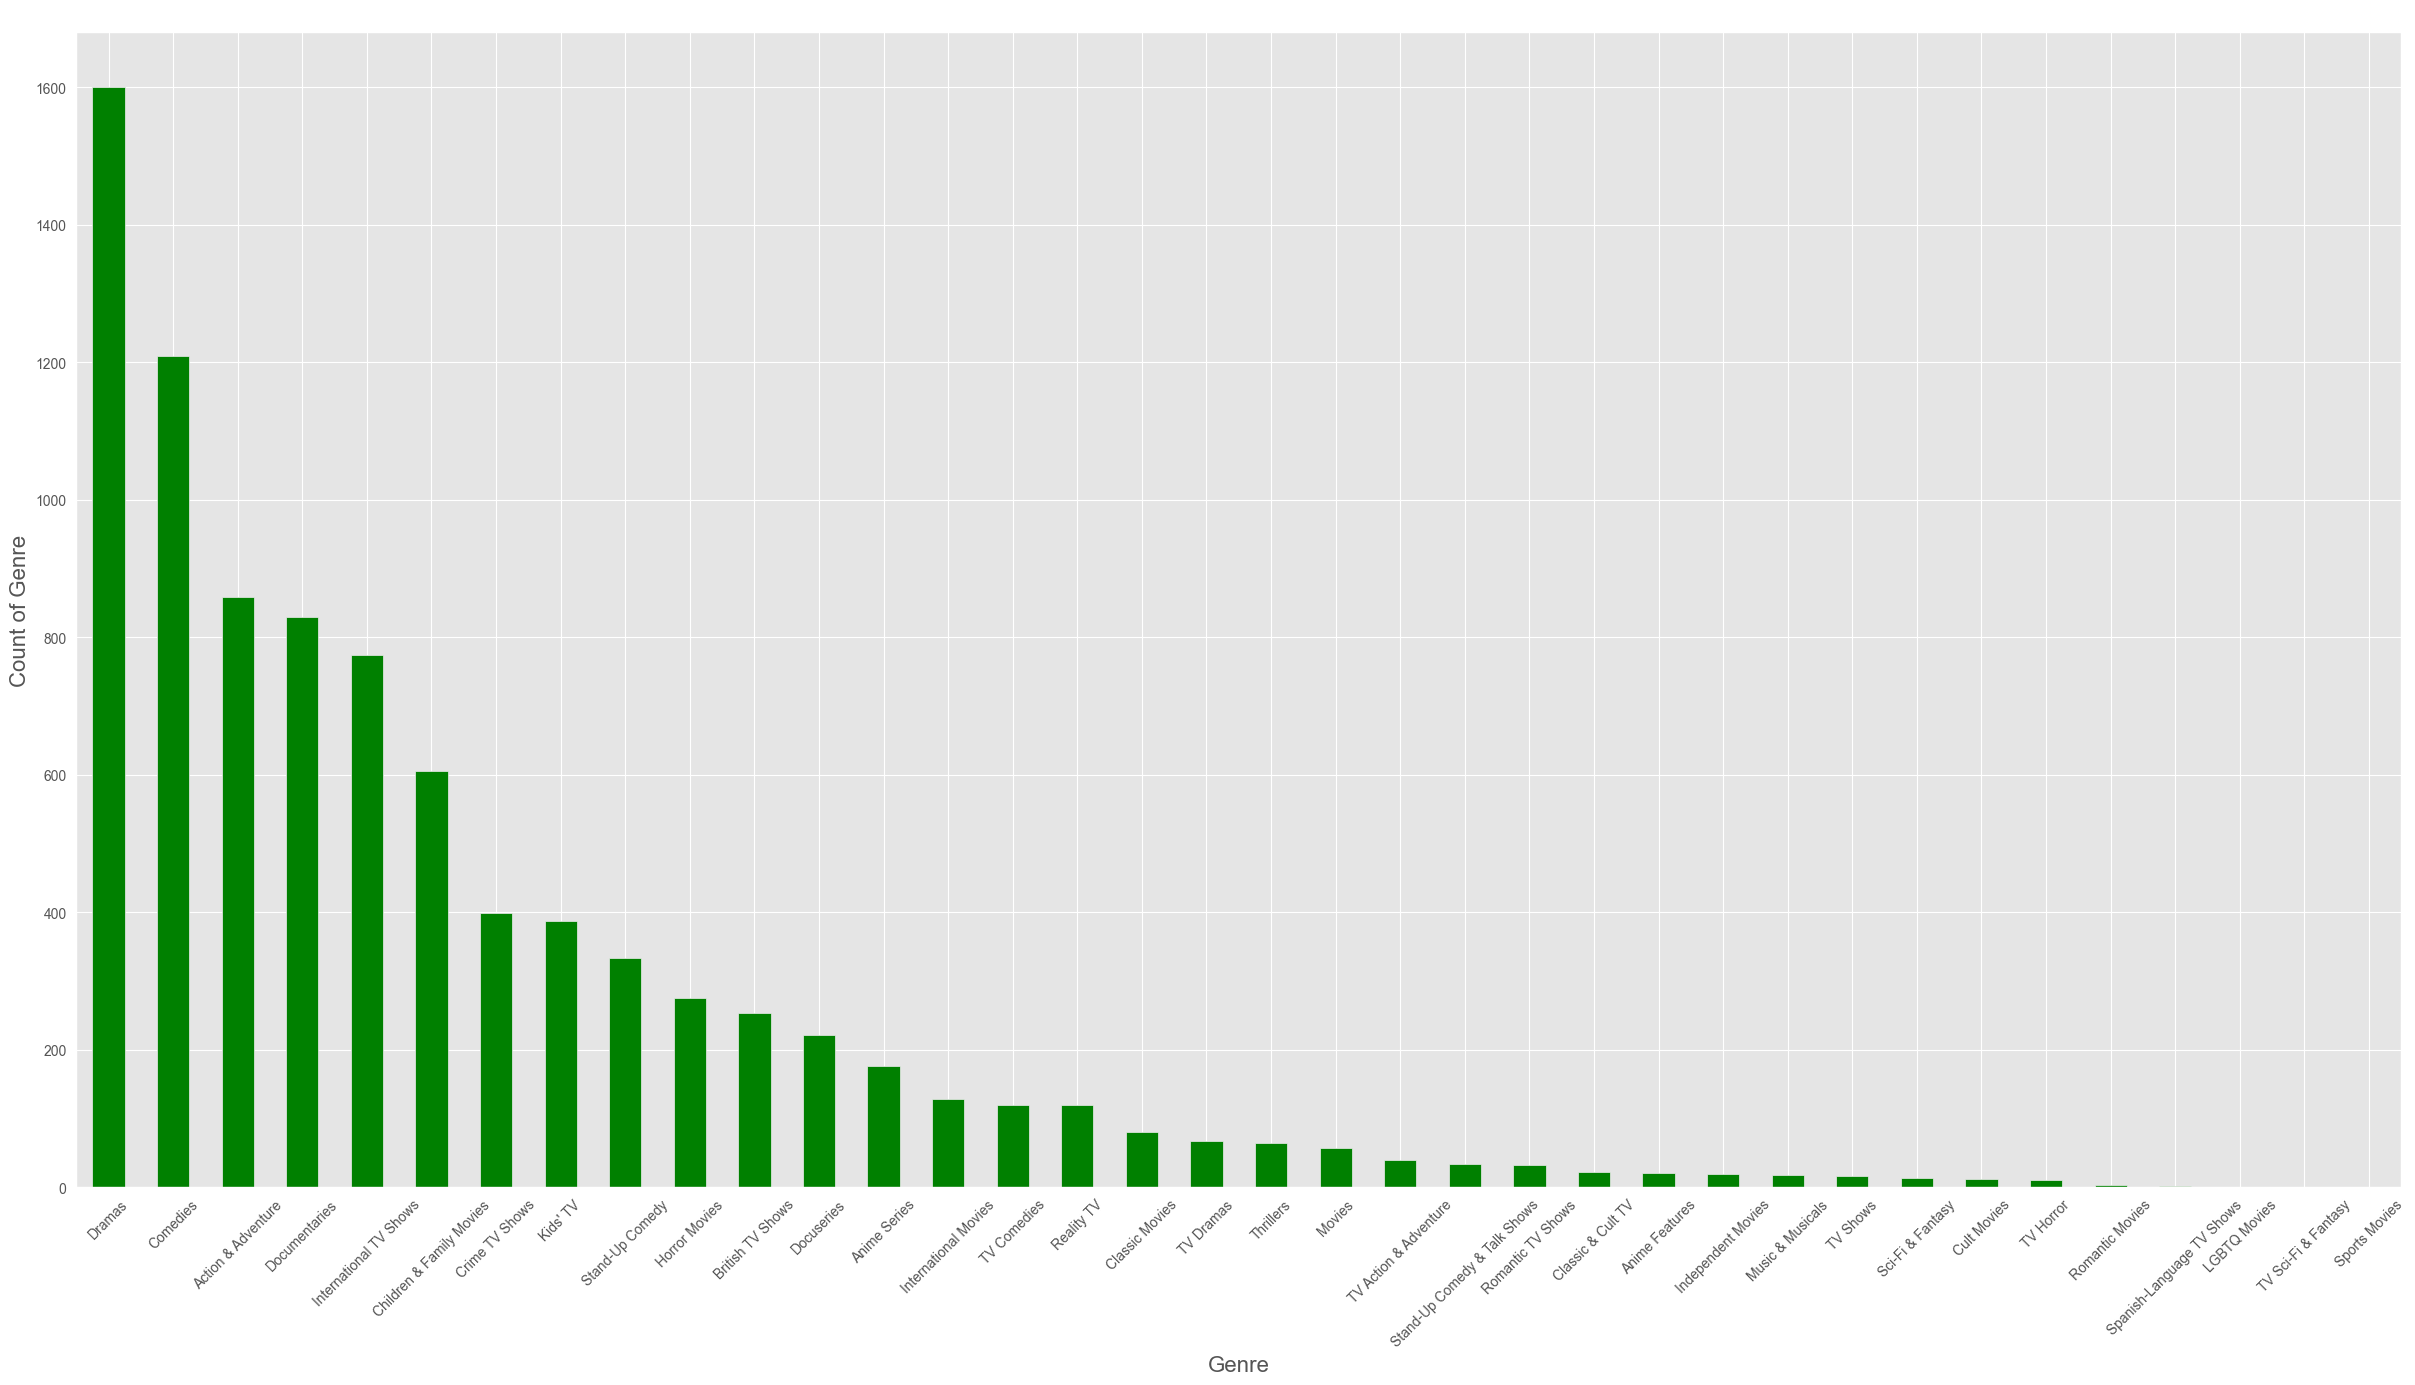

In [35]:
plt.style.use('ggplot')
plt.figure(figsize=(30, 15))
genre_count.plot(kind='bar',color='green')
plt.xlabel('Genre',fontsize=16)
plt.ylabel('Count of Genre',fontsize=16)
plt.title('Count of premired genre on Netflix')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

* from this we can see that Genre Drama is the highest premiered genre

### Top 10 contributed Directors

In [56]:
data["director"].value_counts().head(10)

director
Missing                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Name: count, dtype: int64

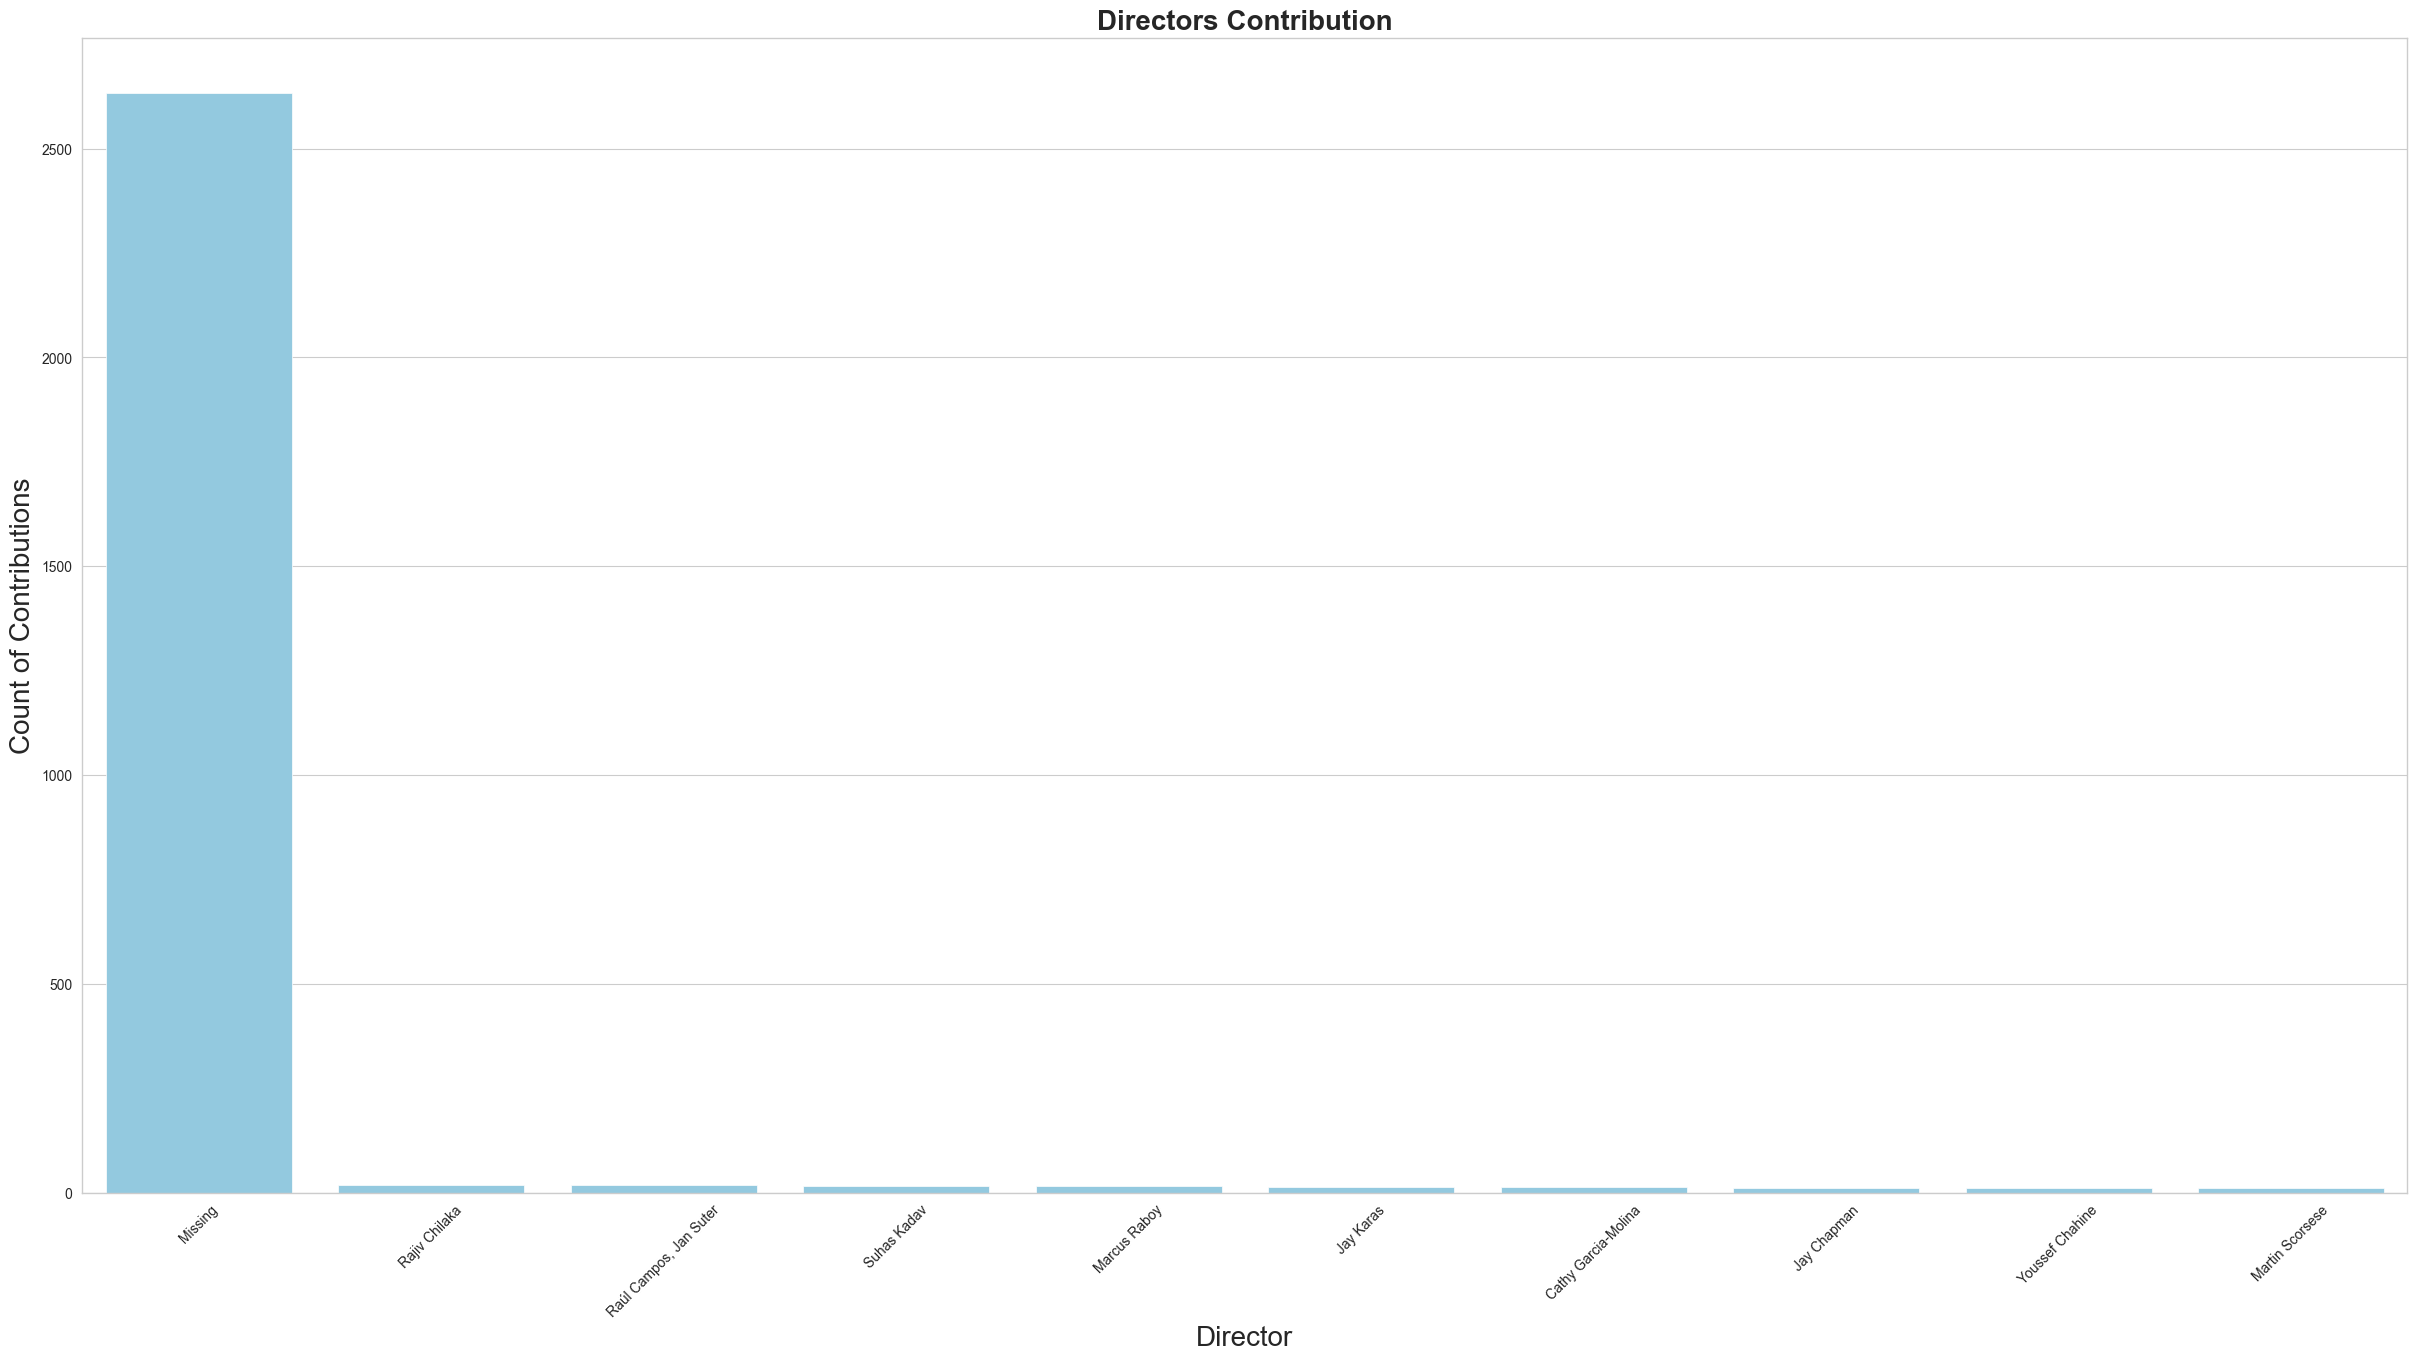

In [49]:
plt.figure(figsize=(30, 15))
sns.set_style("whitegrid")
sns.countplot(x="director", order=data["director"].value_counts().index[:10], data=data, color='skyblue')
plt.xlabel('Director', fontsize=20)
plt.ylabel('Count of Contributions', fontsize=20)
plt.title('Directors Contribution', fontsize=20, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

* from  this we can see most of details of director are missing, By the available data Director Rajiv Chilaka is the most contributed director